In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Importing the part df
"""
date_parser = pd.datetools.to_datetime
headers = ['ID', 'Country', 'Carrier', 'TrafficType', 'ClickDate', 'Device', 'Browser', 'OS', 
          'RefererUrl', 'UserIp', 'ConversionStatus', 'ConversionDate', 'ConversionPayOut', 
           'publisherId', 'subPublisherId', 'advertiserCampaignId', 'Fraud']
dtypes = {'col1': 'str', 'col2': 'str', 'col3': 'str', 'col4': 'float'}
parse_dates = ['ClickDate']
"""
PartTrndf = pd.read_csv('train.csv', nrows=100000, low_memory=False)

In [ ]:
"""
print ('The shape of the Full training Data is: ', FullTrndf.shape)
# Segregate only the Converted Data Set
ConvTrndf = FullTrndf[FullTrndf.ConversionStatus==True]
print ('The shape of the Converted Training Data is: ', ConvTrndf.shape)
print ('The Percentage of convertion is: ', ((ConvTrndf.shape[0] / FullTrndf.shape[0])*100))
"""

In [ ]:
"""
print ('There are about', FullTrndf.Country.nunique(), 'unique Country available in the training data')
print ('The top 5 share of Country in the training data are as below:')
print (FullTrndf.Country.value_counts(normalize =  True, sort=True, ascending=False).head(5))
print ("--------------------------------------------------------------------------------------------------")
print ('There are about', FullTrndf.Carrier.nunique(), 'unique Carrier available in the training data')
print ('The top 3 share of Carrier in the training data are as below:')
print (FullTrndf.Carrier.value_counts(normalize =  True, sort=True, ascending=False).head(3))
print ("--------------------------------------------------------------------------------------------------")
print ('There are about', FullTrndf.TrafficType.nunique(), 'unique TrafficType available in the training data')
print ('The count of TrafficType in the training data are as below:')
print (FullTrndf.TrafficType.value_counts(normalize =  True, sort=True, ascending=False))
print ("--------------------------------------------------------------------------------------------------")
print ('There are about', FullTrndf.Device.nunique(), 'unique Device available in the training data')
print ('The top 3 share of Device in the training data are as below:')
print (FullTrndf.Device.value_counts(normalize =  True, sort=True, ascending=False).head(3))
print ("--------------------------------------------------------------------------------------------------")
print ('There are about', FullTrndf.Browser.nunique(), 'unique Browser available in the training data')
print ('The top 3 share of Browser in the training data are as below:')
print (FullTrndf.Browser.value_counts(normalize =  True, sort=True, ascending=False).head(3))
print ("--------------------------------------------------------------------------------------------------")
print ('There are about', FullTrndf.OS.nunique(), 'unique OS available in the training data')
print ('The top 3 share of OS in the training data are as below:')
print (FullTrndf.OS.value_counts(normalize =  True, sort=True, ascending=False).head(3))
"""

In [44]:
PartTrndf.shape

(100000, 17)

In [45]:
All_y = PartTrndf[['ConversionStatus','ConversionDate','ConversionPayOut']]

In [62]:
print ('Disntict count of advertiserCampaignId is: ', PartTrndf.advertiserCampaignId.nunique())
print ('Disntict count of publisherId is: ', PartTrndf.publisherId.nunique())
print ('Disntict count of UserIp is: ', PartTrndf.UserIp.nunique())
print ('Disntict count of Carrier is: ', PartTrndf.Carrier.nunique())

Disntict count of advertiserCampaignId is:  259
Disntict count of publisherId is:  826
Disntict count of UserIp is:  78646
Disntict count of Carrier is:  239


In [46]:
# Removing the variables that are part of Y
del PartTrndf['ConversionStatus'], PartTrndf['ConversionDate'], PartTrndf['ConversionPayOut']
# Removing the variables that we will not be using
del PartTrndf['subPublisherId'], PartTrndf['RefererUrl'], PartTrndf['Device'], PartTrndf['UserIp']

In [47]:
PartTrndf.shape

(100000, 11)

In [48]:
PartTrndf.head()

,ID,Country,Carrier,TrafficType,ClickDate,Browser,OS,UserIp,publisherId,advertiserCampaignId,Fraud
0,0,IN,2.0,M,2017-08-21 00:00:01,chrome,Android,42.111.171.131,69,6555.0,0.0
1,1,TH,27.0,A,2017-08-21 00:00:01,46.0.2490.76,Android,1.46.235.65,646,7510.0,0.0
2,2,IN,4.0,M,2017-08-21 00:00:01,chromium,Android,49.15.91.224,301,12696.0,0.0
3,3,PH,-1.0,A,2017-08-21 00:00:01,android_webkit,Android,115.42.126.86,242,735.0,0.0
4,4,MX,-1.0,NaN,2017-08-21 00:00:01,chrome,Android,187.161.11.97,1306,7802.0,0.0


In [49]:
# Checking for the ratio of missing value
PartTrndf_na = (PartTrndf.isnull().sum() / len(PartTrndf)) * 100
PartTrndf_na = PartTrndf_na.drop(PartTrndf_na[PartTrndf_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :PartTrndf_na})
missing_data.head(20)

,Missing Ratio
TrafficType,13.639
Country,0.545
OS,0.448
Browser,0.346


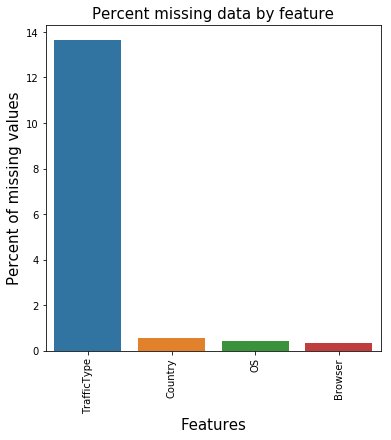

In [50]:
f, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation='90')
sns.barplot(x=PartTrndf_na.index, y=PartTrndf_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [51]:
# Replace the Missing value
PartTrndf['TrafficType'] = PartTrndf.TrafficType.fillna('UN')
PartTrndf['Country'] = PartTrndf.Country.fillna('UN')
PartTrndf['Browser'] = PartTrndf.Browser.fillna('UN')
PartTrndf['OS'] = PartTrndf.OS.fillna('UN')

In [52]:
# Checking for the missing value details after the replacement
# Checking for the ratio of missing value
PartTrndf_na = (PartTrndf.isnull().sum() / len(PartTrndf)) * 100
PartTrndf_na = PartTrndf_na.drop(PartTrndf_na[PartTrndf_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :PartTrndf_na})
missing_data.head(20)

,Missing Ratio


In [53]:
# Handing the ClickDate field as a Date
PartTrndf['ClickDate'] = pd.to_datetime(PartTrndf['ClickDate'])
#PartTrndf['ClickDate'] = pd.to_datetime(PartTrndf['ClickDate'])

In [54]:
# Feature Enginerring to Create New variables for Day of Week and Day part
PartTrndf['Weekday'] = (PartTrndf['ClickDate'].dt.dayofweek).astype(int)
PartTrndf['Dayhour'] = (PartTrndf.ClickDate.apply(lambda x: x.hour)).astype(int)

In [55]:
# To remove Ordinality in both Weekday and DayHour variables convert into Categories
PartTrndf['Weekday'] = PartTrndf['Weekday'].map( {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed',
                                                  4: 'Thr', 5: 'Fri', 6: 'Sat'} ).astype(str)
PartTrndf['Dayhour'] = PartTrndf['Dayhour'].map( {0: 'PrAM', 1: 'PrAM', 2: 'PrAM', 3: 'PrAM', 
                                                  4: 'PrAM', 5: 'PrAM', 6: 'AM', 7: 'AM', 8: 'AM', 9: 'AM', 
                                                  10: 'AM', 11: 'AM', 12: 'PM', 13: 'PM', 14: 'PM', 15: 'PM', 
                                                  16: 'PM', 17: 'PM', 18: 'PM', 19: 'PoPM', 20: 'PoPM', 
                                                  21: 'PoPM', 22: 'PoPM', 23: 'PoPM',} ).astype(str)
# Delete the Click Date varaible
del PartTrndf['ClickDate']

In [65]:
del PartTrndf['Carrier'], PartTrndf['UserIp'], PartTrndf['publisherId'], PartTrndf['advertiserCampaignId']

In [66]:
PartTrndf.head()

,ID,Country,TrafficType,Browser,OS,Fraud,Weekday,Dayhour
0,0,IN,M,chrome,Android,0.0,Sun,PrAM
1,1,TH,A,46.0.2490.76,Android,0.0,Sun,PrAM
2,2,IN,M,chromium,Android,0.0,Sun,PrAM
3,3,PH,A,android_webkit,Android,0.0,Sun,PrAM
4,4,MX,UN,chrome,Android,0.0,Sun,PrAM
